In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scanpy as sc
import scanpy.external as sce
import harmonypy as hm

In [3]:
adata = sc.read_h5ad("scRNA/adata_clustered_wctrl.h5ad")

In [5]:
adata.X

array([[-0.48513156, -0.5121596 , -0.3302972 , ..., -0.08204601,
        -0.16856912, -0.34665984],
       [-0.48513156, -0.5121596 ,  1.6755838 , ..., -0.08204601,
        -0.16856912,  0.2304531 ],
       [-0.48513156, -0.5121596 , -0.3302972 , ..., -0.08204601,
        -0.16856912,  1.0377588 ],
       ...,
       [-0.48513156,  5.5926843 , -0.3302972 , ..., -0.08204601,
        -0.16856912, -2.3771014 ],
       [-0.48513156, -0.5121596 ,  5.3427734 , ..., -0.08204601,
        -0.16856912,  1.4996698 ],
       [-0.48513156, -0.5121596 , -0.3302972 , ..., -0.08204601,
         5.000654  ,  0.34071705]], dtype=float32)

In [3]:
import scanpy.external as sce
import harmonypy as hm
 

In [4]:
sce.pp.harmony_integrate(adata, 'sample',max_iter_harmony=20,plot_convergence=True)
#ho = hm.run_harmony() 

2023-08-10 18:12:33,579 - harmonypy - INFO - Iteration 1 of 20
2023-08-10 18:12:45,134 - harmonypy - INFO - Iteration 2 of 20
2023-08-10 18:12:56,938 - harmonypy - INFO - Converged after 2 iterations


In [5]:
'X_pca_harmony' in adata.obsm 

True

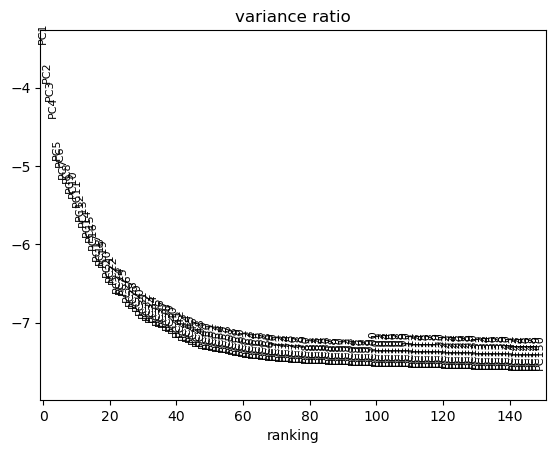

In [6]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=150, save=False) # scanpy generates the filename automatically 

In [7]:
adata.write_h5ad("scRNA/adata_clustered_wctrl_harm_redo.h5ad")

In [2]:
adata = sc.read_h5ad("scRNA/adata_clustered_wctrl_harm_redo.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 17998 × 3796
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden_4', 'leiden_2', 'leiden_1', 'leiden_3', 'leiden_0.5', 'leiden_0.25', 'leiden_0.75'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_1_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [9]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']


In [11]:
from threadpoolctl import threadpool_limits
with threadpool_limits(limits=50, user_api='blas'):
    sc.pp.neighbors(adata, n_neighbors=30, n_pcs=60,)
    sc.tl.umap(adata)
    sc.tl.leiden(adata) 

In [12]:
adata.write_h5ad("scRNA/adata_clustered_wctrl_harm_cluster_redo.h5ad")

In [2]:
adata = sc.read_h5ad("scRNA/adata_clustered_wctrl_harm_cluster_redo.h5ad")

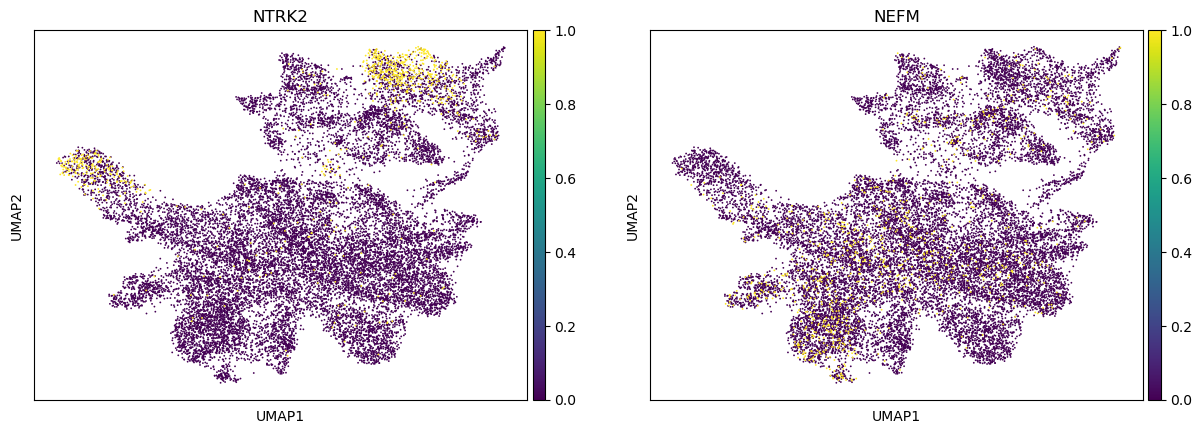

In [13]:
sc.pl.umap(adata, color=['NTRK2', 'NEFM'],vmax=1)

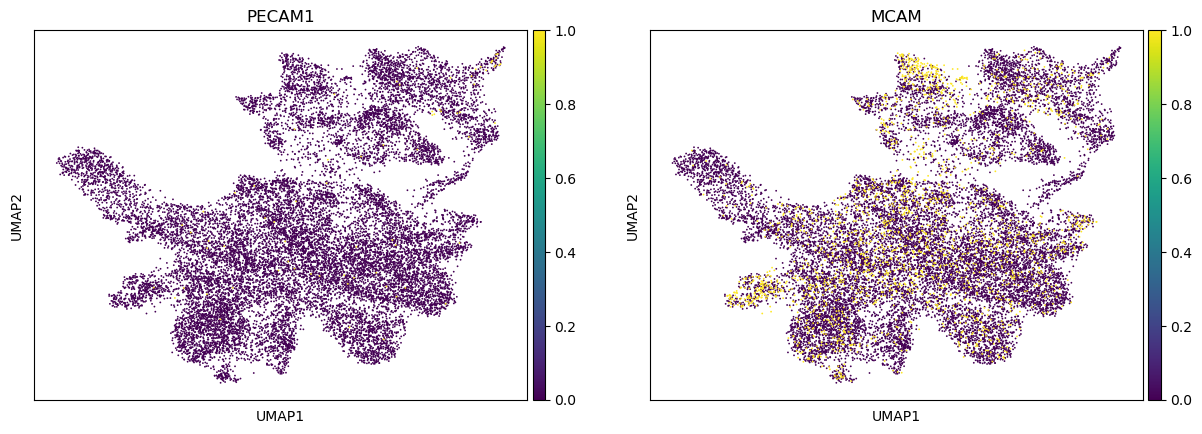

In [14]:
sc.pl.umap(adata, color=['PECAM1','MCAM'],vmax=1)

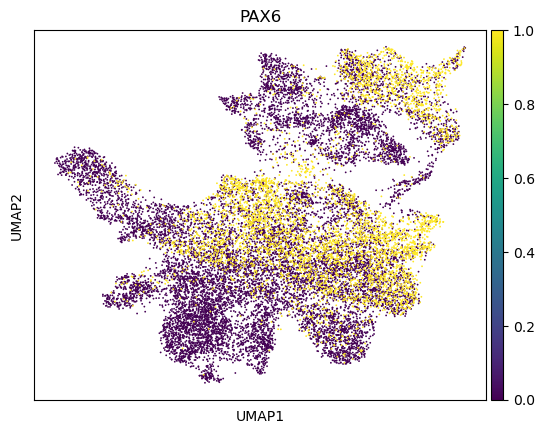

In [71]:
sc.pl.umap(adata, color=['PAX6'],vmax=1)

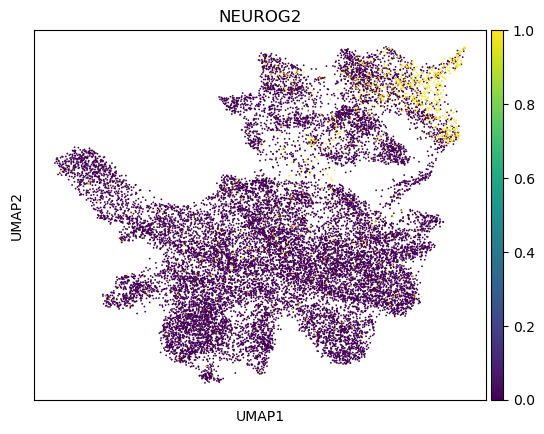

In [70]:
sc.pl.umap(adata, color=['NEUROG2'],vmax=1)

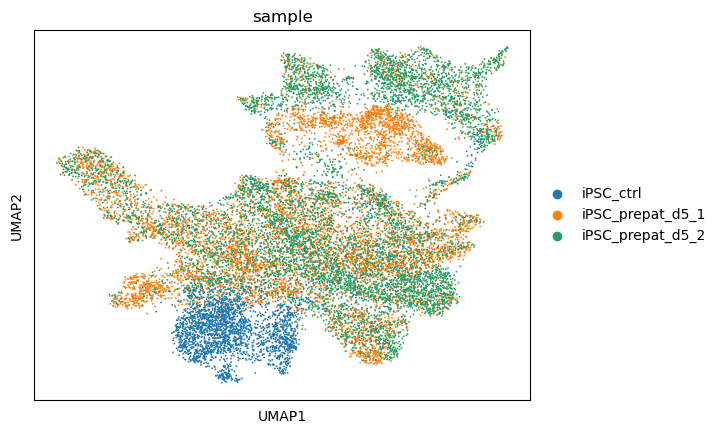

In [15]:
sc.pl.umap(adata, color=['sample'],vmax=1)

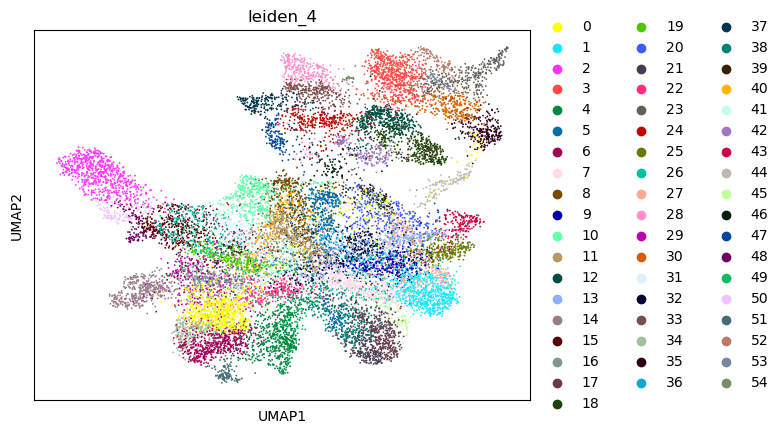

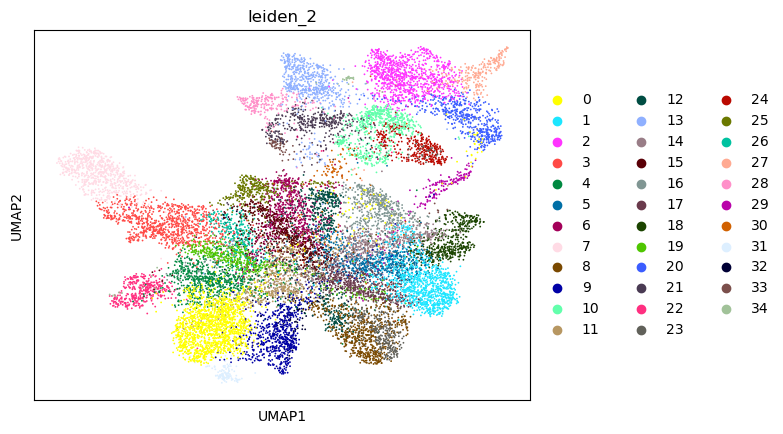

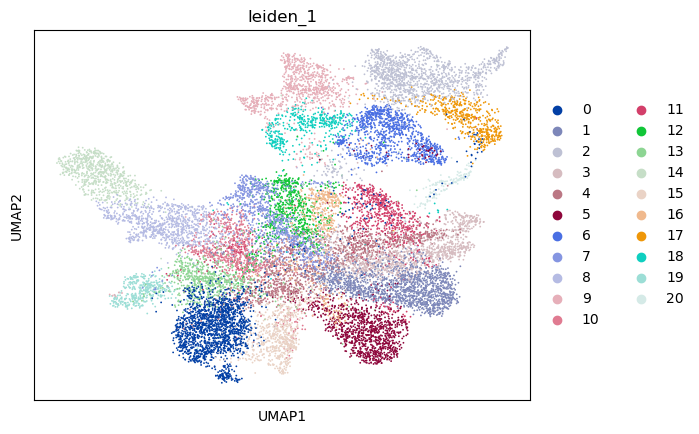

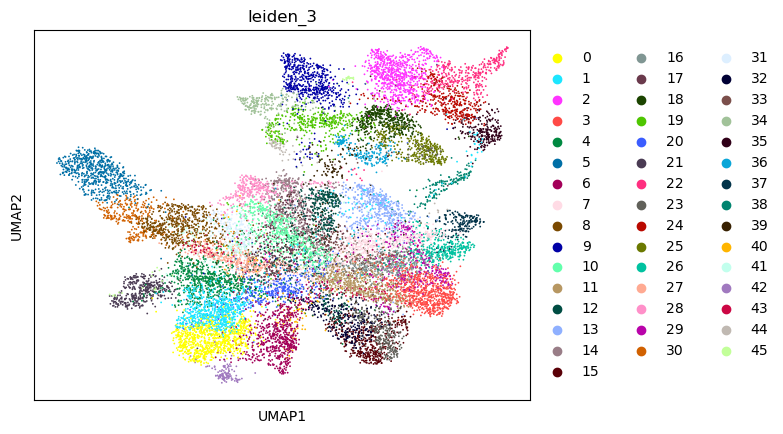

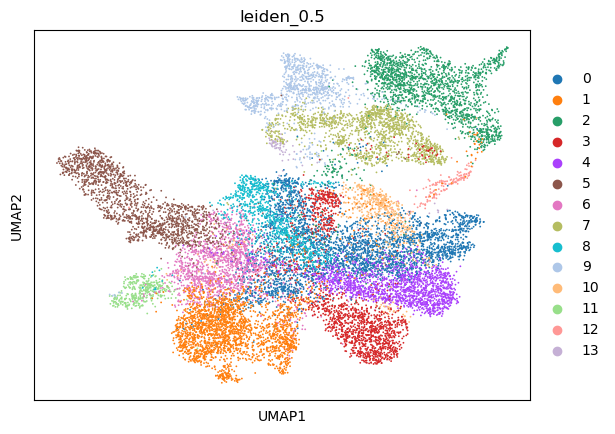

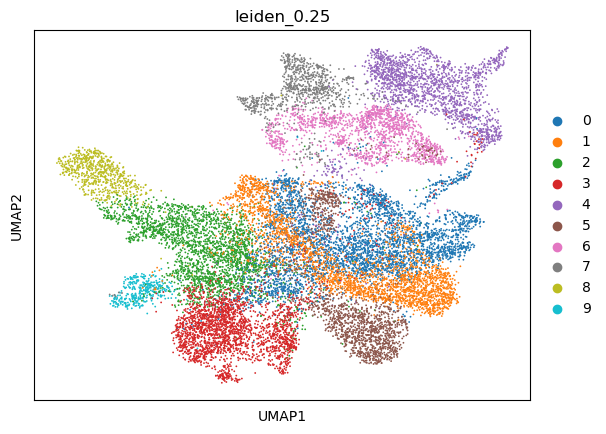

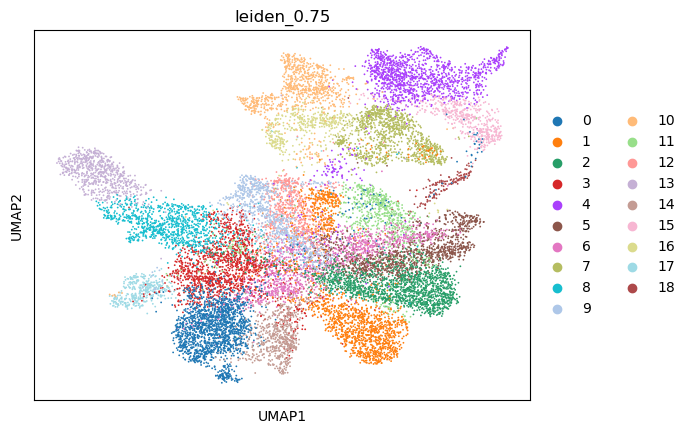

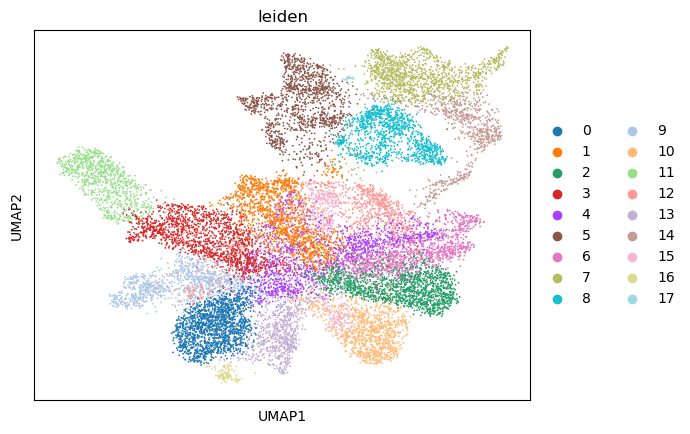

In [16]:
clusterings = [x for x in adata.obs.columns if 'leiden' in x]
for clustering in clusterings:
    sc.pl.umap(adata, color=[clustering],vmax=1)
    plt.show()
    plt.close()